In [1]:
# Importing libraries

In [2]:
import xlrd
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
from statsmodels.stats import weightstats as stests
from scipy.special import stdtr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from pylab import rcParams
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.datasets import make_regression
import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
# Prevent scroll bars

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Retrieving Data

In [7]:
# Creating BS Students Data

In [8]:
bs_data = pd.read_excel(open('data.xlsx', 'rb'), sheet_name='BS Students', index_col=None, header=1)

In [9]:
bs_data.head()

,Year of Admission and Batch of the student,Gender,Resedential Area and city of origin,SSC Marks,HSSC Marks,Entry Test Score Marks,1st Semester,2nd Semester,3rd Semester,4th Semester,5th Semester,6th Semester,7th Semester,8th Semester,9th Semester,10th Semester,11th Semester,12th Semester,13th Semester,14th Semester,15th Semester,Cumulative GPA
0,2012,M,Karachi,645.0,364.0,43.68,1.41,2.15,2.00,2.10,1.37,0.00,1.50,1.10,2.00,0.69,2.33,1.60,2.00,1.08,0.00,1.92
1,2013,M,Karachi,638.0,312.0,47.04,1.22,2.31,1.98,0.41,2.02,0.76,4.00,1.56,1.23,1.15,0.00,1.67,1.50,0.00,0.00,2.09
2,2013,M,Karachi,693.0,686.0,47.73,1.74,1.54,2.85,1.35,1.00,1.67,1.52,3.00,1.07,2.04,2.00,2.07,1.44,1.33,NaN,2.00
3,2013,M,Karachi,649.0,838.0,57.68,1.16,2.49,1.61,1.04,2.73,1.43,1.00,1.78,1.62,3.33,2.40,2.05,2.67,2.08,1.33,2.14
4,2013,M,Karachi,705.0,650.0,41.98,1.08,2.87,0.88,1.25,3.33,1.72,1.31,1.90,2.00,0.93,1.50,1.58,1.73,0.00,NaN,2.01


In [10]:
# Creating Alumni Students Data

In [11]:
alumni_data = pd.read_excel(open('data.xlsx', 'rb'), sheet_name='Alumni Data', index_col=None, header=1)

In [12]:
alumni_data.head()

,Year of Admission and Batch of the student,Gender,Resedential Area and city of origin,SSC Marks,HSSC Marks,Entry Test Score Marks,1st Semester,2nd Semester,3rd Semester,4th Semester,5th Semester,6th Semester,7th Semester,8th Semester,9th Semester,10th Semester,11th Semester,12th Semester,13th Semester,14th Semester,15th Semester,16th Semester,17th Semester,18th Semester,19th Semester,Cumulative GPA
0,20103,F,Karachi,NaN,NaN,0.0,1.88,2.33,2.46,2.72,2.82,3.13,3.17,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.77
1,20103,F,Karachi,NaN,735.0,0.0,2.10,2.14,2.56,2.02,2.05,2.60,2.56,2.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.28
2,20103,M,Karachi,670.0,851.0,0.0,2.53,2.96,3.13,3.09,3.53,3.00,3.33,3.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.10
3,20103,M,Karachi,600.0,819.0,0.0,2.77,2.71,3.08,3.00,2.81,2.96,3.27,3.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.96
4,20103,M,Karachi,596.0,935.0,0.0,3.10,3.63,3.63,3.08,3.65,3.07,3.13,3.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.32


In [13]:
# Concating both dataframes because they have same type of data.

In [14]:
combined_data = pd.concat([bs_data,alumni_data], sort=False)

In [15]:
combined_data.head()

,Year of Admission and Batch of the student,Gender,Resedential Area and city of origin,SSC Marks,HSSC Marks,Entry Test Score Marks,1st Semester,2nd Semester,3rd Semester,4th Semester,5th Semester,6th Semester,7th Semester,8th Semester,9th Semester,10th Semester,11th Semester,12th Semester,13th Semester,14th Semester,15th Semester,Cumulative GPA,16th Semester,17th Semester,18th Semester,19th Semester
0,2012,M,Karachi,645.0,364.0,43.68,1.41,2.15,2.00,2.10,1.37,0.00,1.50,1.10,2.00,0.69,2.33,1.60,2.00,1.08,0.00,1.92,NaN,NaN,NaN,NaN
1,2013,M,Karachi,638.0,312.0,47.04,1.22,2.31,1.98,0.41,2.02,0.76,4.00,1.56,1.23,1.15,0.00,1.67,1.50,0.00,0.00,2.09,NaN,NaN,NaN,NaN
2,2013,M,Karachi,693.0,686.0,47.73,1.74,1.54,2.85,1.35,1.00,1.67,1.52,3.00,1.07,2.04,2.00,2.07,1.44,1.33,NaN,2.00,NaN,NaN,NaN,NaN
3,2013,M,Karachi,649.0,838.0,57.68,1.16,2.49,1.61,1.04,2.73,1.43,1.00,1.78,1.62,3.33,2.40,2.05,2.67,2.08,1.33,2.14,NaN,NaN,NaN,NaN
4,2013,M,Karachi,705.0,650.0,41.98,1.08,2.87,0.88,1.25,3.33,1.72,1.31,1.90,2.00,0.93,1.50,1.58,1.73,0.00,NaN,2.01,NaN,NaN,NaN,NaN


In [16]:
combined_data.describe()

,Year of Admission and Batch of the student,SSC Marks,HSSC Marks,Entry Test Score Marks,1st Semester,2nd Semester,3rd Semester,4th Semester,5th Semester,6th Semester,7th Semester,8th Semester,9th Semester,10th Semester,11th Semester,12th Semester,13th Semester,14th Semester,15th Semester,Cumulative GPA,16th Semester,17th Semester,18th Semester,19th Semester
count,1952.000000,1466.000000,1042.000000,1947.000000,1950.000000,1468.000000,1444.000000,1090.000000,1057.000000,841.000000,789.000000,565.000000,301.000000,174.000000,104.000000,61.000000,37.000000,22.000000,8.000000,1952.000000,1.0,1.0,1.00,1.0
mean,5530.044570,710.834243,752.624760,47.745557,1.712795,2.626117,1.912258,2.378651,2.062195,2.292628,1.797465,2.158690,2.038804,1.926092,1.932885,1.590820,1.856216,1.245455,0.908750,1.972510,0.0,0.0,1.17,0.0
std,7157.717563,85.262160,151.661842,26.234600,1.166671,0.672852,1.267644,0.885437,1.236618,0.929650,1.306918,1.172794,0.995541,0.972643,1.014609,0.995793,1.008402,1.078468,1.027263,1.209504,NaN,NaN,NaN,NaN
min,2012.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.17,0.0
25%,2017.000000,663.000000,725.000000,53.535000,0.482500,2.270000,0.247500,1.842500,1.340000,1.870000,0.000000,1.670000,1.670000,1.407500,1.415000,1.000000,1.440000,0.000000,0.000000,1.057500,0.0,0.0,1.17,0.0
50%,2018.000000,702.000000,792.000000,58.470000,1.960000,2.670000,2.230000,2.420000,2.410000,2.400000,2.080000,2.500000,2.220000,2.065000,2.170000,1.770000,2.110000,1.040000,0.665000,2.370000,0.0,0.0,1.17,0.0
75%,2019.000000,737.000000,844.750000,63.040000,2.605000,3.080000,2.830000,3.070000,2.980000,2.930000,2.870000,3.000000,2.730000,2.670000,2.530000,2.170000,2.670000,2.060000,1.635000,2.790000,0.0,0.0,1.17,0.0
max,20113.000000,991.000000,973.000000,100.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.750000,3.840000,3.840000,3.670000,3.340000,3.170000,2.500000,3.970000,0.0,0.0,1.17,0.0


In [17]:
print(combined_data.shape)

(1952, 26)


In [18]:
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 378
Data columns (total 26 columns):
Year of Admission and Batch of the student    1952 non-null int64
Gender                                        1952 non-null object
Resedential Area and city of origin           1952 non-null object
SSC Marks                                     1466 non-null float64
HSSC Marks                                    1042 non-null float64
Entry Test Score Marks                        1947 non-null float64
1st Semester                                  1950 non-null float64
2nd Semester                                  1468 non-null float64
3rd Semester                                  1444 non-null float64
4th Semester                                  1090 non-null float64
5th Semester                                  1057 non-null float64
6th Semester                                  841 non-null float64
7th Semester                                  789 non-null float64
8th Semester    

In [19]:
print(combined_data.isnull().values.any())

True


# Data Preparation

In [20]:
# Checking missing values of each column (result of info but in percentages for better understanding)

In [21]:
for col in combined_data.columns :
    print(col + " = " + str(combined_data[col].value_counts().sum()/len(combined_data.index)))

Year of Admission and Batch of the student = 1.0
Gender = 1.0
Resedential Area and city of origin = 1.0
SSC Marks = 0.7510245901639344
HSSC Marks = 0.5338114754098361
Entry Test Score Marks = 0.9974385245901639
1st Semester = 0.9989754098360656
2nd Semester = 0.7520491803278688
3rd Semester = 0.7397540983606558
4th Semester = 0.5584016393442623
5th Semester = 0.5414959016393442
6th Semester = 0.43084016393442626
7th Semester = 0.4042008196721312
8th Semester = 0.2894467213114754
9th Semester = 0.15420081967213115
10th Semester = 0.08913934426229508
11th Semester = 0.05327868852459016
12th Semester = 0.03125
13th Semester = 0.018954918032786885
14th Semester = 0.011270491803278689
15th Semester = 0.004098360655737705
Cumulative GPA = 1.0
16th Semester = 0.0005122950819672131
17th Semester = 0.0005122950819672131
18th Semester = 0.0005122950819672131
19th Semester = 0.0005122950819672131


In [22]:
# Checking categorical data

In [23]:
categoricalColumns = combined_data.dtypes.loc[combined_data.dtypes=='object'].index
print(categoricalColumns)

Index(['Gender', 'Resedential Area and city of origin'], dtype='object')


In [24]:
# Converting Gender and City data types to category because it consumes less memory

In [25]:
combined_data[['Gender','Resedential Area and city of origin']] = combined_data[['Gender','Resedential Area and city of origin']].apply(lambda x: x.astype('category'))

In [26]:
# Converting Year data type to int

In [27]:
combined_data[['Year of Admission and Batch of the student']] = combined_data[['Year of Admission and Batch of the student']].apply(lambda x: x.astype('Int64'))

In [28]:
# Converting Marks data type to float

In [29]:
combined_data[['SSC Marks','Entry Test Score Marks','1st Semester','2nd Semester','3rd Semester','Cumulative GPA']] = combined_data[['SSC Marks','Entry Test Score Marks','1st Semester','2nd Semester','3rd Semester','Cumulative GPA']].apply(lambda x: x.astype('Float64'))

In [30]:
# Checking dataframe data types

In [31]:
combined_data.dtypes

Year of Admission and Batch of the student       int64
Gender                                        category
Resedential Area and city of origin           category
SSC Marks                                      float64
HSSC Marks                                     float64
Entry Test Score Marks                         float64
1st Semester                                   float64
2nd Semester                                   float64
3rd Semester                                   float64
4th Semester                                   float64
5th Semester                                   float64
6th Semester                                   float64
7th Semester                                   float64
8th Semester                                   float64
9th Semester                                   float64
10th Semester                                  float64
11th Semester                                  float64
12th Semester                                  float64
13th Semes

quick view after changing data types of columns 

In [32]:
combined_data.head()

,Year of Admission and Batch of the student,Gender,Resedential Area and city of origin,SSC Marks,HSSC Marks,Entry Test Score Marks,1st Semester,2nd Semester,3rd Semester,4th Semester,5th Semester,6th Semester,7th Semester,8th Semester,9th Semester,10th Semester,11th Semester,12th Semester,13th Semester,14th Semester,15th Semester,Cumulative GPA,16th Semester,17th Semester,18th Semester,19th Semester
0,2012,M,Karachi,645.0,364.0,43.68,1.41,2.15,2.00,2.10,1.37,0.00,1.50,1.10,2.00,0.69,2.33,1.60,2.00,1.08,0.00,1.92,NaN,NaN,NaN,NaN
1,2013,M,Karachi,638.0,312.0,47.04,1.22,2.31,1.98,0.41,2.02,0.76,4.00,1.56,1.23,1.15,0.00,1.67,1.50,0.00,0.00,2.09,NaN,NaN,NaN,NaN
2,2013,M,Karachi,693.0,686.0,47.73,1.74,1.54,2.85,1.35,1.00,1.67,1.52,3.00,1.07,2.04,2.00,2.07,1.44,1.33,NaN,2.00,NaN,NaN,NaN,NaN
3,2013,M,Karachi,649.0,838.0,57.68,1.16,2.49,1.61,1.04,2.73,1.43,1.00,1.78,1.62,3.33,2.40,2.05,2.67,2.08,1.33,2.14,NaN,NaN,NaN,NaN
4,2013,M,Karachi,705.0,650.0,41.98,1.08,2.87,0.88,1.25,3.33,1.72,1.31,1.90,2.00,0.93,1.50,1.58,1.73,0.00,NaN,2.01,NaN,NaN,NaN,NaN


In [33]:
print(combined_data.isnull().values.any())

True


In [34]:
# Replacing empty values with NaN

In [35]:
combined_data.replace('', np.NaN, inplace=True)

In [36]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 378
Data columns (total 26 columns):
Year of Admission and Batch of the student    1952 non-null int64
Gender                                        1952 non-null category
Resedential Area and city of origin           1952 non-null category
SSC Marks                                     1466 non-null float64
HSSC Marks                                    1042 non-null float64
Entry Test Score Marks                        1947 non-null float64
1st Semester                                  1950 non-null float64
2nd Semester                                  1468 non-null float64
3rd Semester                                  1444 non-null float64
4th Semester                                  1090 non-null float64
5th Semester                                  1057 non-null float64
6th Semester                                  841 non-null float64
7th Semester                                  789 non-null float64
8th Semester

In [37]:
# Dropping records if there is null record in 1st semester

In [38]:
combined_data.drop(combined_data[combined_data['1st Semester'].isnull()].index, inplace=True)
combined_data.drop(combined_data[combined_data['1st Semester'] == 0.0].index, inplace=True)

In [39]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 377
Data columns (total 26 columns):
Year of Admission and Batch of the student    1468 non-null int64
Gender                                        1468 non-null category
Resedential Area and city of origin           1468 non-null category
SSC Marks                                     1142 non-null float64
HSSC Marks                                    992 non-null float64
Entry Test Score Marks                        1463 non-null float64
1st Semester                                  1468 non-null float64
2nd Semester                                  1465 non-null float64
3rd Semester                                  1441 non-null float64
4th Semester                                  1088 non-null float64
5th Semester                                  1055 non-null float64
6th Semester                                  839 non-null float64
7th Semester                                  786 non-null float64
8th Semester 

In [40]:
print(combined_data.isnull().values.any())

True


In [41]:
# Deleting records of 2019 because it has very less data

In [42]:
combined_data = combined_data[combined_data['Year of Admission and Batch of the student'] != 2019]

In [43]:
# Replacing NaN with mean in SSC, HSC and Test.
# Replaced with mean instead of mode beacuse 0 is the most occuring value
# Did not replace 0 with mean for BS data because we need 0 in BS data to find the result of warnings

In [44]:
combined_data['Entry Test Score Marks'].fillna(combined_data['Entry Test Score Marks'].mean() , inplace= True)
combined_data["SSC Marks"].fillna(combined_data["SSC Marks"].mean() , inplace= True)
combined_data['HSSC Marks'].fillna(combined_data["HSSC Marks"].mean(), inplace=True)

In [45]:
print(combined_data.isnull().values.any())

True


In [46]:
# Renaming column values to make them easy to use

In [47]:
old_names = ['Year of Admission and Batch of the student', 'Resedential Area and city of origin', 'Cumulative GPA'] 
new_names = ['Year', 'City', 'CGPA']
combined_data.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [48]:
#moving CGPA column to end
try:
    temp = combined_data.pop('CGPA')
    combined_data['CGPA'] = temp
except:
    print('check the result')

In [49]:
combined_data.columns

Index(['Year', 'Gender', 'City', 'SSC Marks', 'HSSC Marks', 'Entry Test Score Marks', '1st Semester', '2nd Semester', '3rd Semester', '4th Semester', '5th Semester', '6th Semester', '7th Semester', '8th Semester', '9th Semester', '10th Semester', '11th Semester', '12th Semester', '13th Semester', '14th Semester', '15th Semester', '16th Semester', '17th Semester', '18th Semester', '19th Semester', 'CGPA'], dtype='object')

Dropping 17th+ columns because HEC has rule about BS degree which is, degree should be completed within 8 years (16th semesters max)

In [50]:
try:
    combined_data.drop(['17th Semester', '18th Semester', '19th Semester'], axis = 1, inplace=True)
except:
    print('already removed')

In [51]:
# Verifying missing values of each column

In [52]:
for col in combined_data.columns :
    print(col + " = " + str(combined_data[col].value_counts().sum()/len(combined_data.index) ))

Year = 1.0
Gender = 1.0
City = 1.0
SSC Marks = 1.0
HSSC Marks = 1.0
Entry Test Score Marks = 1.0
1st Semester = 1.0
2nd Semester = 0.9979564032697548
3rd Semester = 0.9816076294277929
4th Semester = 0.7411444141689373
5th Semester = 0.7186648501362398
6th Semester = 0.5715258855585831
7th Semester = 0.5354223433242506
8th Semester = 0.38419618528610355
9th Semester = 0.20367847411444143
10th Semester = 0.1178474114441417
11th Semester = 0.07016348773841961
12th Semester = 0.04087193460490463
13th Semester = 0.02452316076294278
14th Semester = 0.01430517711171662
15th Semester = 0.004768392370572207
16th Semester = 0.0006811989100817438
CGPA = 1.0


In [53]:
# Checking unique values of Year

In [54]:
unique_year = combined_data['Year'].unique()
print(unique_year)

[ 2012  2013  2014  2015  2016  2017  2018 20103 20113]


In [55]:
# Correcting wrong values of year

In [56]:
combined_data['Year'].replace([20103, 20113], [2010, 2011], inplace=True)

In [57]:
# Setting year as index

In [58]:
try:
    combined_data.set_index('Year', inplace = True)
except:
    print('already set')

In [59]:
# Sorting index

In [60]:
combined_data.sort_index(inplace=True)

In [61]:
# Checking unique values of index

In [62]:
unique_year = combined_data.index.unique()
print(unique_year)

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype='int64', name='Year')


In [63]:
# Checking unique values of Gender

In [64]:
unique_gender = combined_data['Gender'].unique()
print(unique_gender)

[F, M]
Categories (2, object): [F, M]


In [65]:
# CGPA Formula

In [66]:
def CGPA_to_Percentage(x):
    if(x == 4.00):
        return 100
    elif((x >= 3.67) & (x< 4.00)):
        return 82
    elif((x >= 3.33) & (x < 3.67)):
        return 78
    elif((x >= 3.00) & (x < 3.33)):
        return 74
    elif((x >= 2.67) & (x < 3.00)):
        return 70
    elif((x >= 2.33) & (x < 2.67)):
        return 66
    elif((x >= 2.00) & (x < 2.33)):
        return 62
    elif((x >= 1.67) & (x < 2.00)):
        return 58
    elif((x > 1.33) & (x < 1.67)):
        return 54
    elif((x > 1.00) & (x < 1.33)):
        return 50
    else:
        return 0

combined_data['CGPA_Percentage'] = combined_data['CGPA'].map(lambda x: CGPA_to_Percentage(x))

In [67]:
combined_data.head()

,Gender,City,SSC Marks,HSSC Marks,Entry Test Score Marks,1st Semester,2nd Semester,3rd Semester,4th Semester,5th Semester,6th Semester,7th Semester,8th Semester,9th Semester,10th Semester,11th Semester,12th Semester,13th Semester,14th Semester,15th Semester,16th Semester,CGPA,CGPA_Percentage
Year,,,,,,,,,,,,,,,,,,,,,,,
2010,F,Karachi,91.0,91.0,40.79,2.54,3.17,2.67,0.57,0.92,1.67,2.83,1.60,2.22,1.57,1.69,NaN,NaN,NaN,NaN,NaN,2.13,62
2010,M,Karachi,626.0,810.0,0.00,3.53,3.10,3.54,3.24,3.39,3.00,3.20,3.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.28,74
2010,M,Karachi,605.0,309.0,0.00,1.18,2.13,2.18,1.89,2.37,1.21,2.00,2.08,2.58,2.00,2.17,NaN,NaN,NaN,NaN,NaN,2.20,62
2010,M,Hyderabad,630.0,880.0,0.00,1.50,3.05,1.90,1.78,2.43,1.65,2.83,2.39,1.72,2.33,NaN,NaN,NaN,NaN,NaN,NaN,2.24,62
2010,M,Karachi,573.0,610.0,0.00,1.53,2.72,1.83,1.68,2.06,1.47,2.44,1.94,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.13,62


# Data Exploration

<Figure size 1080x576 with 0 Axes>

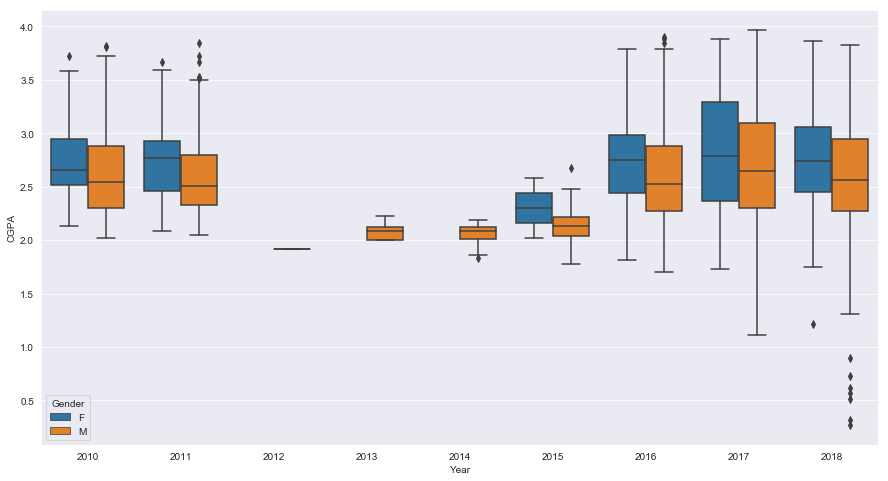

In [68]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.boxplot(data=combined_data,
            x=combined_data.index,
            y="CGPA",
            hue="Gender")

## Entire BS trends for both male and female

In [69]:
students_year_cgpa = combined_data.groupby(['Year','Gender'])['CGPA'].agg('mean')

In [70]:
students_year_cgpa_unstacked =  students_year_cgpa.unstack()
students_year_cgpa_unstacked

Gender,F,M
Year,,
2010,2.749630,2.636096
2011,2.759286,2.615057
2012,NaN,1.920000
2013,NaN,2.081429
2014,NaN,2.060000
2015,2.300000,2.146829
2016,2.750000,2.600132
2017,2.827442,2.705517
2018,2.792576,2.567096


Average performance comparison (F and M)

<Figure size 1080x576 with 0 Axes>

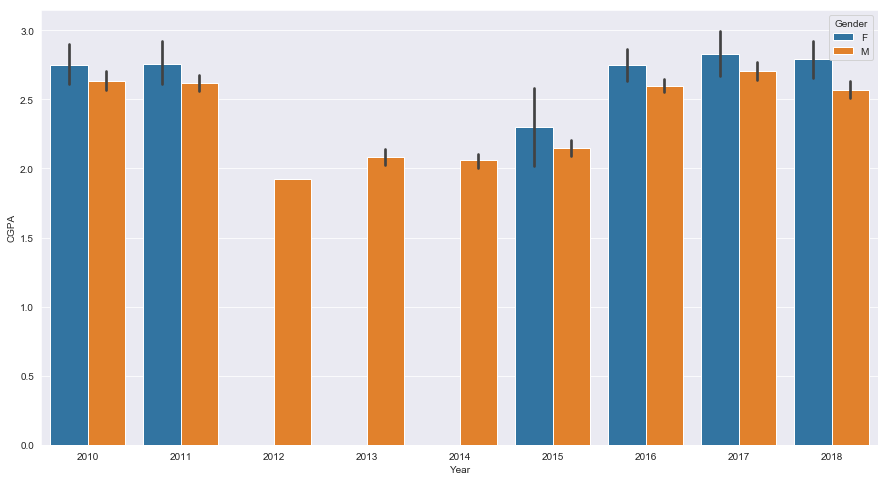

In [71]:
plt.figure(figsize=(15,8))
sns.barplot(x=combined_data.index, y = combined_data['CGPA'], hue=combined_data["Gender"])

In [72]:
combined_data.columns

Index(['Gender', 'City', 'SSC Marks', 'HSSC Marks', 'Entry Test Score Marks', '1st Semester', '2nd Semester', '3rd Semester', '4th Semester', '5th Semester', '6th Semester', '7th Semester', '8th Semester', '9th Semester', '10th Semester', '11th Semester', '12th Semester', '13th Semester', '14th Semester', '15th Semester', '16th Semester', 'CGPA', 'CGPA_Percentage'], dtype='object')

Semester wise avergae performance of 2010 students

In [73]:
performance_of_all_years = combined_data.iloc[:,5:-2]
performance_of_all_years.head()

,1st Semester,2nd Semester,3rd Semester,4th Semester,5th Semester,6th Semester,7th Semester,8th Semester,9th Semester,10th Semester,11th Semester,12th Semester,13th Semester,14th Semester,15th Semester,16th Semester
Year,,,,,,,,,,,,,,,,
2010,2.54,3.17,2.67,0.57,0.92,1.67,2.83,1.60,2.22,1.57,1.69,NaN,NaN,NaN,NaN,NaN
2010,3.53,3.10,3.54,3.24,3.39,3.00,3.20,3.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,1.18,2.13,2.18,1.89,2.37,1.21,2.00,2.08,2.58,2.00,2.17,NaN,NaN,NaN,NaN,NaN
2010,1.50,3.05,1.90,1.78,2.43,1.65,2.83,2.39,1.72,2.33,NaN,NaN,NaN,NaN,NaN,NaN
2010,1.53,2.72,1.83,1.68,2.06,1.47,2.44,1.94,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
performance_of_all_years = performance_of_all_years.melt(id_vars=[], 
        var_name="Semesters", 
        value_name="GPA")

In [75]:
performance_of_all_years.head()

,Semesters,GPA
0,1st Semester,2.54
1,1st Semester,3.53
2,1st Semester,1.18
3,1st Semester,1.50
4,1st Semester,1.53


In [76]:
performance_of_all_years.groupby(['Semesters'], sort=False)['GPA'].agg('mean')

Semesters
1st Semester     2.272582
2nd Semester     2.628805
3rd Semester     1.913241
4th Semester     2.380055
5th Semester     2.062009
6th Semester     2.293135
7th Semester     1.799618
8th Semester     2.159557
9th Semester     2.039465
10th Semester    1.922775
11th Semester    1.925728
12th Semester    1.587833
13th Semester    1.865278
14th Semester    1.209524
15th Semester    0.681429
16th Semester    0.000000
Name: GPA, dtype: float64

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, '1st Semester'),
 Text(0, 0, '2nd Semester'),
 Text(0, 0, '3rd Semester'),
 Text(0, 0, '4th Semester'),
 Text(0, 0, '5th Semester'),
 Text(0, 0, '6th Semester'),
 Text(0, 0, '7th Semester'),
 Text(0, 0, '8th Semester'),
 Text(0, 0, '9th Semester'),
 Text(0, 0, '10th Semester'),
 Text(0, 0, '11th Semester'),
 Text(0, 0, '12th Semester'),
 Text(0, 0, '13th Semester'),
 Text(0, 0, '14th Semester'),
 Text(0, 0, '15th Semester'),
 Text(0, 0, '16th Semester')]

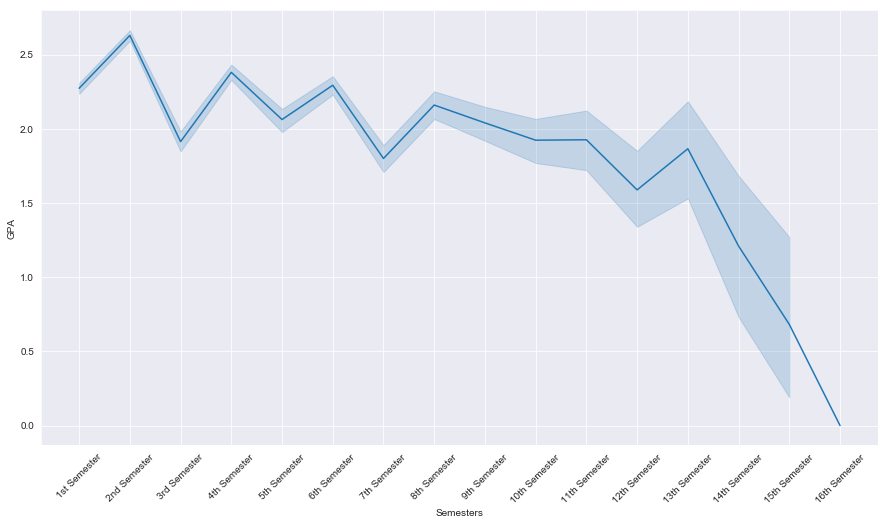

In [77]:
plt.figure(figsize=(15,8))
chart = sns.lineplot(data=performance_of_all_years, x='Semesters', y='GPA', sort=False)
chart.set_xticklabels(performance_of_all_years['Semesters'].unique(), rotation=45)

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, '1st Semester'),
 Text(0, 0, '2nd Semester'),
 Text(0, 0, '3rd Semester'),
 Text(0, 0, '4th Semester'),
 Text(0, 0, '5th Semester'),
 Text(0, 0, '6th Semester'),
 Text(0, 0, '7th Semester'),
 Text(0, 0, '8th Semester'),
 Text(0, 0, '9th Semester'),
 Text(0, 0, '10th Semester'),
 Text(0, 0, '11th Semester'),
 Text(0, 0, '12th Semester'),
 Text(0, 0, '13th Semester'),
 Text(0, 0, '14th Semester'),
 Text(0, 0, '15th Semester')]

Text(0.5, 1.0, '2010')

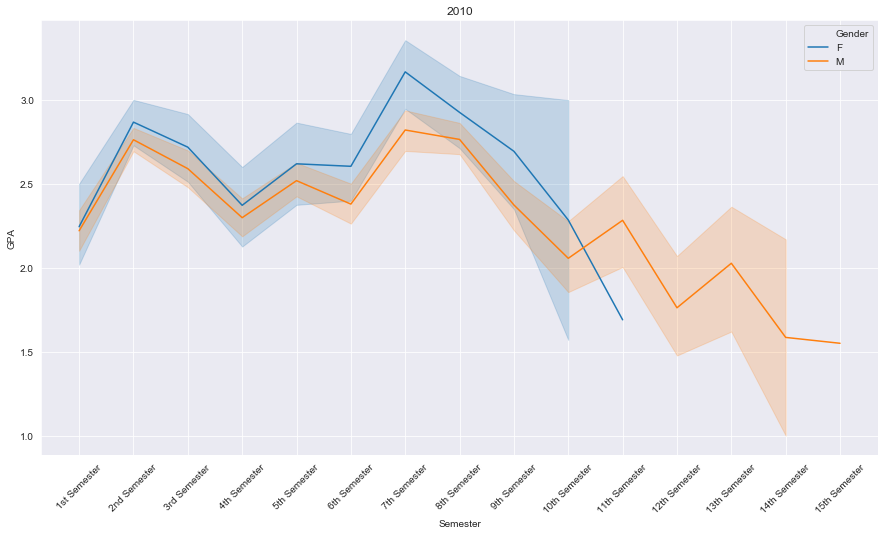

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, '1st Semester'),
 Text(0, 0, '2nd Semester'),
 Text(0, 0, '3rd Semester'),
 Text(0, 0, '4th Semester'),
 Text(0, 0, '5th Semester'),
 Text(0, 0, '6th Semester'),
 Text(0, 0, '7th Semester'),
 Text(0, 0, '8th Semester'),
 Text(0, 0, '9th Semester'),
 Text(0, 0, '10th Semester'),
 Text(0, 0, '11th Semester'),
 Text(0, 0, '12th Semester'),
 Text(0, 0, '13th Semester'),
 Text(0, 0, '14th Semester'),
 Text(0, 0, '15th Semester'),
 Text(0, 0, '16th Semester')]

Text(0.5, 1.0, '2011')

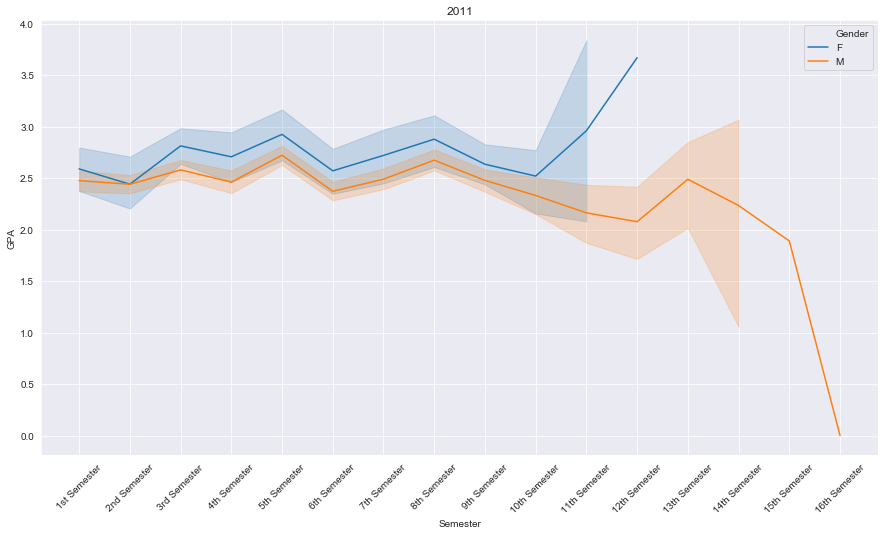

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, '1st Semester'),
 Text(0, 0, '2nd Semester'),
 Text(0, 0, '3rd Semester'),
 Text(0, 0, '4th Semester'),
 Text(0, 0, '5th Semester'),
 Text(0, 0, '6th Semester'),
 Text(0, 0, '7th Semester'),
 Text(0, 0, '8th Semester'),
 Text(0, 0, '9th Semester'),
 Text(0, 0, '10th Semester'),
 Text(0, 0, '11th Semester'),
 Text(0, 0, '12th Semester'),
 Text(0, 0, '13th Semester'),
 Text(0, 0, '14th Semester'),
 Text(0, 0, '15th Semester')]

Text(0.5, 1.0, '2012')

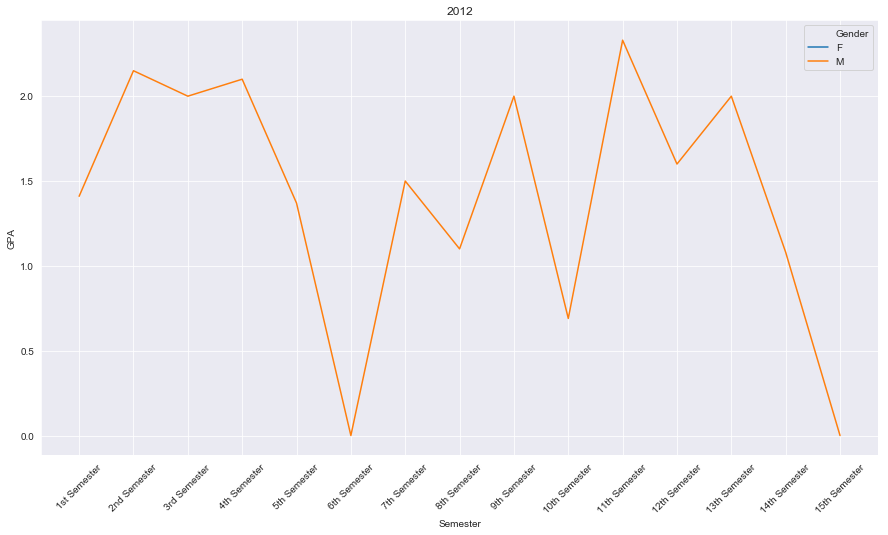

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, '1st Semester'),
 Text(0, 0, '2nd Semester'),
 Text(0, 0, '3rd Semester'),
 Text(0, 0, '4th Semester'),
 Text(0, 0, '5th Semester'),
 Text(0, 0, '6th Semester'),
 Text(0, 0, '7th Semester'),
 Text(0, 0, '8th Semester'),
 Text(0, 0, '9th Semester'),
 Text(0, 0, '10th Semester'),
 Text(0, 0, '11th Semester'),
 Text(0, 0, '12th Semester'),
 Text(0, 0, '13th Semester'),
 Text(0, 0, '14th Semester'),
 Text(0, 0, '15th Semester')]

Text(0.5, 1.0, '2013')

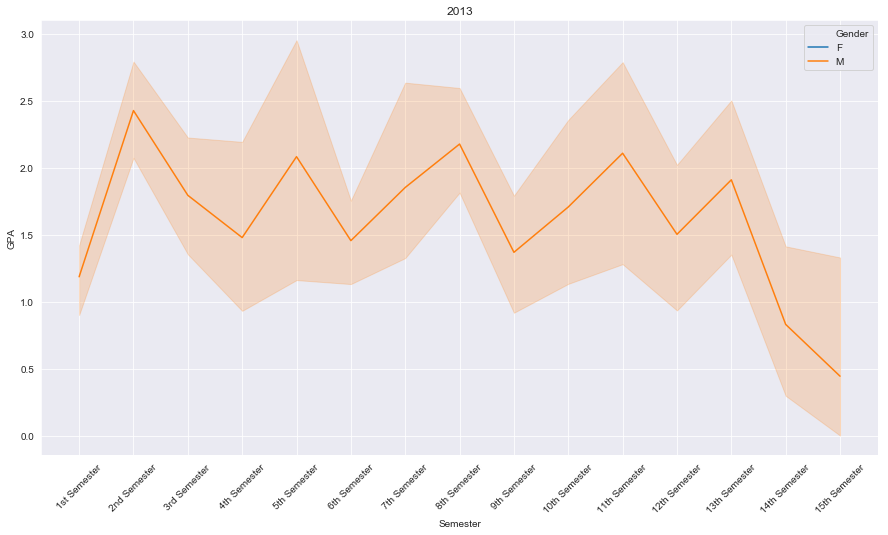

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, '1st Semester'),
 Text(0, 0, '2nd Semester'),
 Text(0, 0, '3rd Semester'),
 Text(0, 0, '4th Semester'),
 Text(0, 0, '5th Semester'),
 Text(0, 0, '6th Semester'),
 Text(0, 0, '7th Semester'),
 Text(0, 0, '8th Semester'),
 Text(0, 0, '9th Semester'),
 Text(0, 0, '10th Semester'),
 Text(0, 0, '11th Semester'),
 Text(0, 0, '12th Semester'),
 Text(0, 0, '13th Semester'),
 Text(0, 0, '14th Semester'),
 Text(0, 0, '15th Semester')]

Text(0.5, 1.0, '2014')

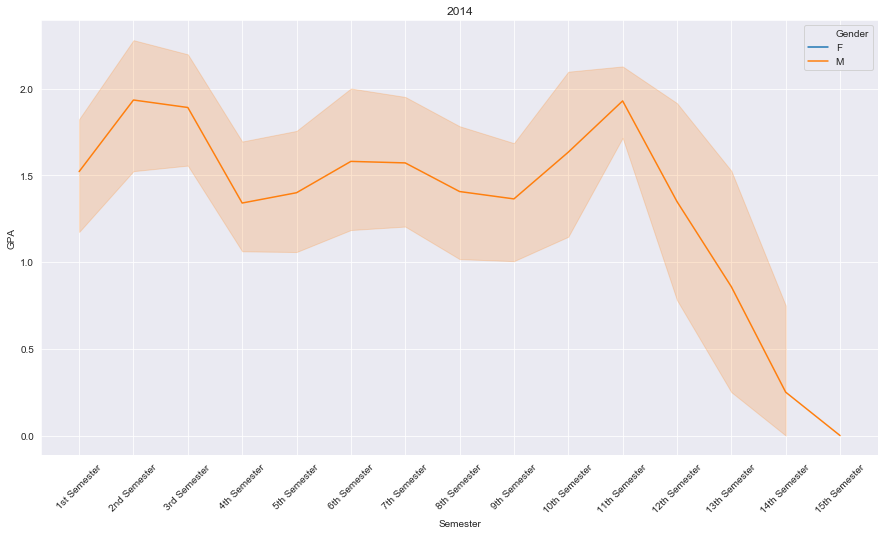

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, '1st Semester'),
 Text(0, 0, '2nd Semester'),
 Text(0, 0, '3rd Semester'),
 Text(0, 0, '4th Semester'),
 Text(0, 0, '5th Semester'),
 Text(0, 0, '6th Semester'),
 Text(0, 0, '7th Semester'),
 Text(0, 0, '8th Semester'),
 Text(0, 0, '9th Semester'),
 Text(0, 0, '10th Semester'),
 Text(0, 0, '11th Semester'),
 Text(0, 0, '12th Semester')]

Text(0.5, 1.0, '2015')

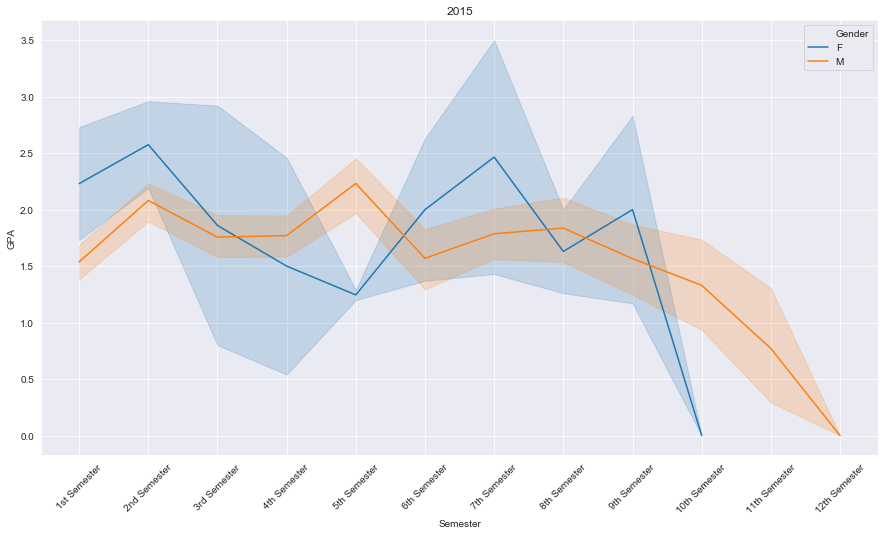

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, '1st Semester'),
 Text(0, 0, '2nd Semester'),
 Text(0, 0, '3rd Semester'),
 Text(0, 0, '4th Semester'),
 Text(0, 0, '5th Semester'),
 Text(0, 0, '6th Semester'),
 Text(0, 0, '7th Semester'),
 Text(0, 0, '8th Semester'),
 Text(0, 0, '9th Semester'),
 Text(0, 0, '10th Semester')]

Text(0.5, 1.0, '2016')

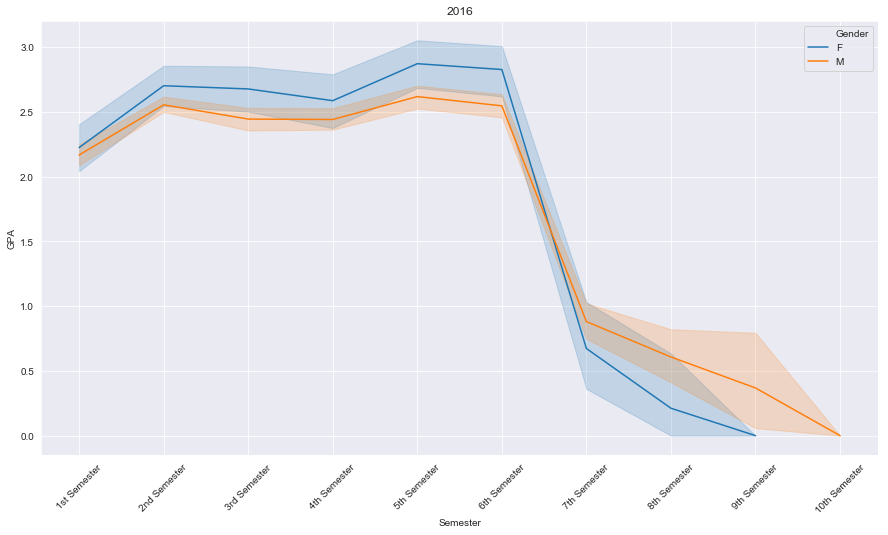

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, '1st Semester'),
 Text(0, 0, '2nd Semester'),
 Text(0, 0, '3rd Semester'),
 Text(0, 0, '4th Semester'),
 Text(0, 0, '5th Semester'),
 Text(0, 0, '6th Semester'),
 Text(0, 0, '7th Semester')]

Text(0.5, 1.0, '2017')

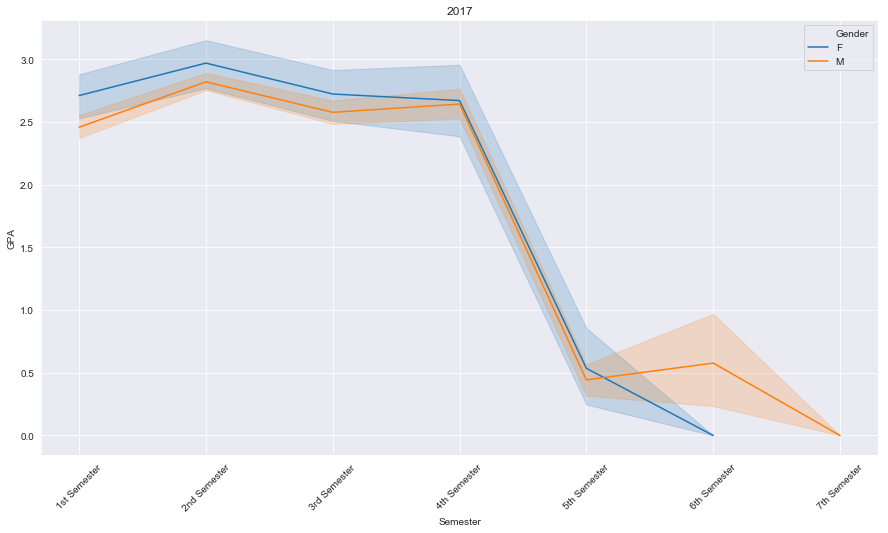

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, '1st Semester'),
 Text(0, 0, '2nd Semester'),
 Text(0, 0, '3rd Semester'),
 Text(0, 0, '4th Semester')]

Text(0.5, 1.0, '2018')

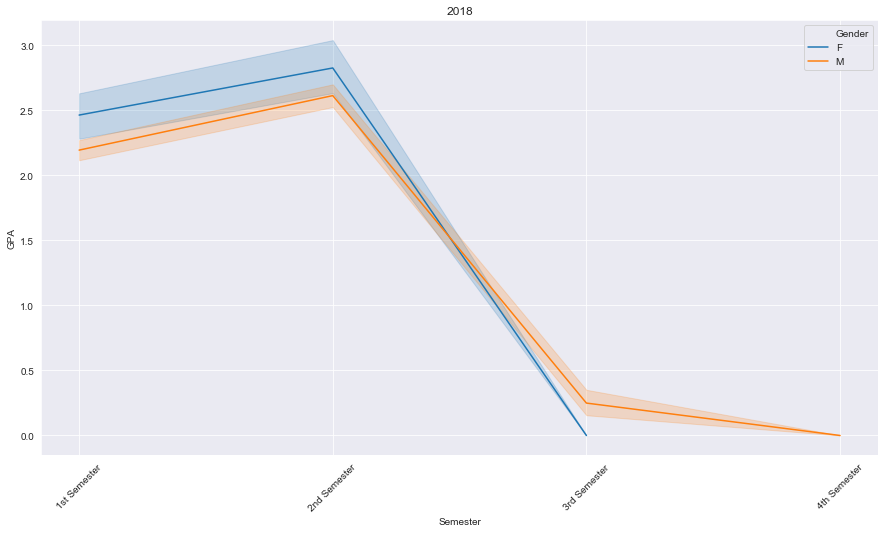

In [78]:
for x in range(2010, 2019):

    performance_of_xth_year = combined_data[combined_data.index == x]

    performance_of_xth_year = performance_of_xth_year.iloc[:,0:-2]

    performance_of_xth_year.drop(columns= ['City', 'SSC Marks', 'HSSC Marks',
       'Entry Test Score Marks'], axis=1, inplace=True)

    performance_of_xth_year = performance_of_xth_year.melt(id_vars=['Gender'], 
        var_name="Semester", 
        value_name="GPA")

    plt.figure(figsize=(15,8))
    chart = sns.lineplot(data=performance_of_xth_year, x='Semester', y='GPA', hue='Gender', sort=False)
    chart.set_xticklabels(performance_of_xth_year['Semester'].unique(), rotation=45)
    chart.set_title(x)
    plt.show()

## Pre BS and BS marks trends

In [79]:
ssc_hsc_nutest_average_percentage = combined_data.iloc[:,2:5].reset_index()
ssc_hsc_nutest_average_percentage['SSC_Percentage'] = ssc_hsc_nutest_average_percentage['SSC Marks'].div(850, axis=0).multiply(100)
ssc_hsc_nutest_average_percentage['HSSC_Percentage'] = ssc_hsc_nutest_average_percentage['HSSC Marks'].div(1100, axis=0).multiply(100)
ssc_hsc_nutest_average_percentage['NU_TEST_Percentage'] = ssc_hsc_nutest_average_percentage['Entry Test Score Marks'].div(100, axis=0).multiply(100)
ssc_hsc_nutest_average_percentage.drop(['SSC Marks','HSSC Marks','Entry Test Score Marks','Year'],axis=1,inplace=True)

In [80]:
ssc_hsc_nutest_average_percentage['Marks_Percentage_Average'] = ssc_hsc_nutest_average_percentage.mean(axis=1)
ssc_hsc_nutest_average_percentage.drop(['SSC_Percentage','HSSC_Percentage','NU_TEST_Percentage'],axis=1,inplace=True)

In [81]:
ssc_hsc_nutest_average_percentage.tail()

,Marks_Percentage_Average
1463,70.135205
1464,76.319394
1465,83.712748
1466,71.434207
1467,74.013084


In [82]:
combined_data.head()

,Gender,City,SSC Marks,HSSC Marks,Entry Test Score Marks,1st Semester,2nd Semester,3rd Semester,4th Semester,5th Semester,6th Semester,7th Semester,8th Semester,9th Semester,10th Semester,11th Semester,12th Semester,13th Semester,14th Semester,15th Semester,16th Semester,CGPA,CGPA_Percentage
Year,,,,,,,,,,,,,,,,,,,,,,,
2010,F,Karachi,91.0,91.0,40.79,2.54,3.17,2.67,0.57,0.92,1.67,2.83,1.60,2.22,1.57,1.69,NaN,NaN,NaN,NaN,NaN,2.13,62
2010,M,Karachi,626.0,810.0,0.00,3.53,3.10,3.54,3.24,3.39,3.00,3.20,3.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.28,74
2010,M,Karachi,605.0,309.0,0.00,1.18,2.13,2.18,1.89,2.37,1.21,2.00,2.08,2.58,2.00,2.17,NaN,NaN,NaN,NaN,NaN,2.20,62
2010,M,Hyderabad,630.0,880.0,0.00,1.50,3.05,1.90,1.78,2.43,1.65,2.83,2.39,1.72,2.33,NaN,NaN,NaN,NaN,NaN,NaN,2.24,62
2010,M,Karachi,573.0,610.0,0.00,1.53,2.72,1.83,1.68,2.06,1.47,2.44,1.94,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.13,62


In [83]:
bs_percentage = pd.DataFrame()
bs_percentage['CGPA_Percentage'] = combined_data['CGPA_Percentage']
bs_percentage.reset_index(drop=True,inplace=True)
bs_percentage.head()

,CGPA_Percentage
0,62
1,74
2,62
3,62
4,62


In [84]:
print(len(ssc_hsc_nutest_average_percentage))
print(len(bs_percentage))

1468
1468


<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Students Average Marks')

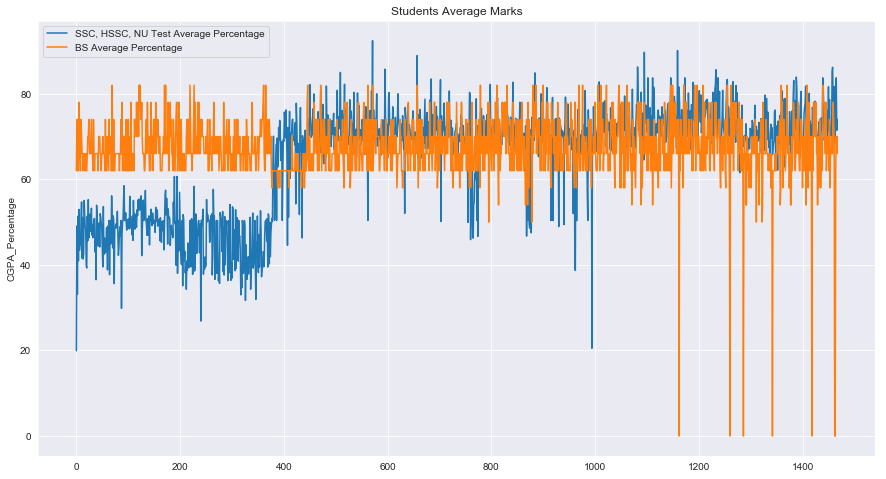

In [85]:
plt.figure(figsize=(15,8))
chart = sns.lineplot(data=ssc_hsc_nutest_average_percentage, x=range(len(ssc_hsc_nutest_average_percentage['Marks_Percentage_Average'])), y= 'Marks_Percentage_Average', legend='brief', label='SSC, HSSC, NU Test Average Percentage',  sort=False)
chat = sns.lineplot(data=bs_percentage, x=range(len(bs_percentage['CGPA_Percentage'])), y='CGPA_Percentage', legend='brief',label='BS Average Percentage', sort=False)
chart.set_title("Students Average Marks")

<Figure size 1080x576 with 0 Axes>

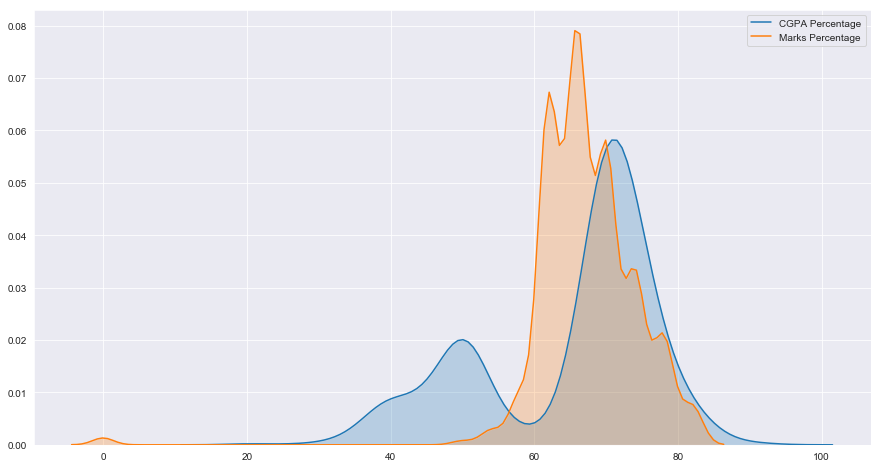

In [86]:
plt.figure(figsize=(15,8))
sns.kdeplot(ssc_hsc_nutest_average_percentage.Marks_Percentage_Average, shade=True, label="CGPA Percentage")
sns.kdeplot(bs_percentage.CGPA_Percentage, shade=True, label="Marks Percentage")

In [87]:
merged_percentages = ssc_hsc_nutest_average_percentage.join(bs_percentage)
merged_percentages.head()

,Marks_Percentage_Average,CGPA_Percentage
0,19.922870,62
1,49.094474,74
2,33.089127,62
3,51.372549,62
4,40.955437,62


Text(0.5, 1.0, 'Students Average Marks')

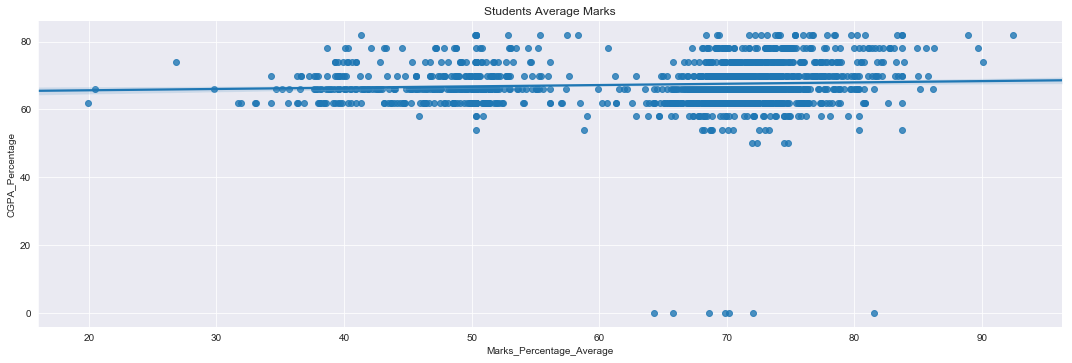

In [88]:
sns.lmplot(data=merged_percentages,
           x="Marks_Percentage_Average",
           y="CGPA_Percentage",
           height=5,
           aspect=3)
plt.title("Students Average Marks")

In [89]:
merged_percentages_corr = merged_percentages.corr(method='pearson')
merged_percentages_corr

,Marks_Percentage_Average,CGPA_Percentage
Marks_Percentage_Average,1.000000,0.064034
CGPA_Percentage,0.064034,1.000000


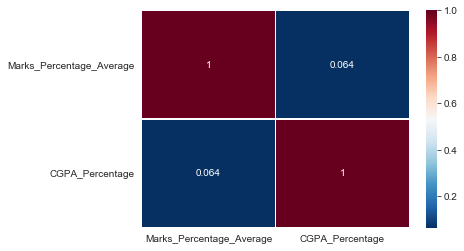

In [90]:
sns.heatmap(merged_percentages_corr, 
            xticklabels=merged_percentages_corr.columns,
            yticklabels=merged_percentages_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [91]:
for col in merged_percentages.columns :
    print(col + " = " + str(merged_percentages[col].value_counts().sum()/len(merged_percentages.index)))

Marks_Percentage_Average = 1.0
CGPA_Percentage = 1.0


In [92]:
print(combined_data.isnull().values.any())

True


In [93]:
merged_percentages.head()

,Marks_Percentage_Average,CGPA_Percentage
0,19.922870,62
1,49.094474,74
2,33.089127,62
3,51.372549,62
4,40.955437,62


In [94]:
ztest ,pval = stests.ztest(merged_percentages['Marks_Percentage_Average'], x2=merged_percentages['CGPA_Percentage'], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.813830520296401e-10
reject null hypothesis


<Figure size 1080x576 with 0 Axes>

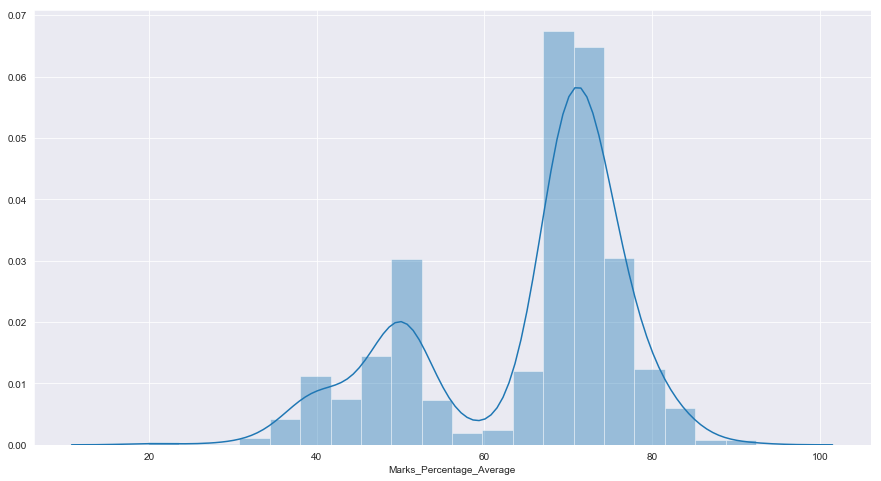

In [95]:
plt.figure(figsize=(15,8))
sns.distplot(merged_percentages["Marks_Percentage_Average"], bins=20 )

<Figure size 1080x576 with 0 Axes>

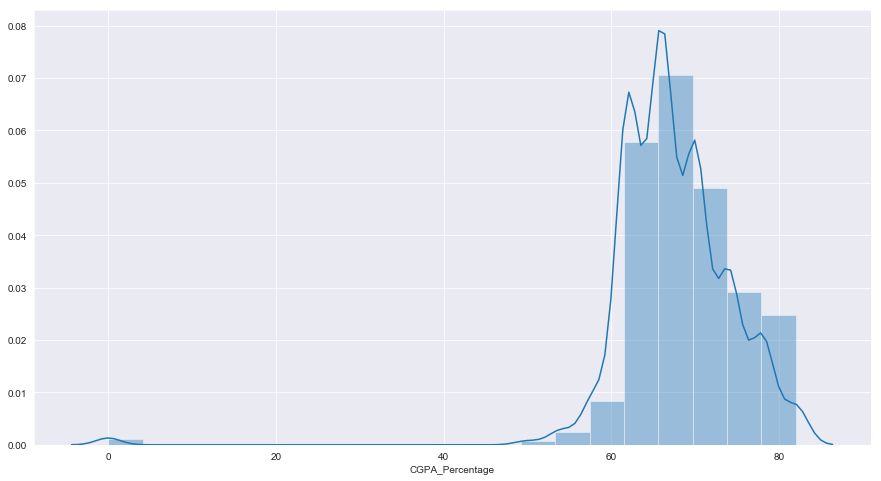

In [96]:
plt.figure(figsize=(15,8))
sns.distplot(merged_percentages["CGPA_Percentage"], bins=20 )

## SSC to BS trends

In [97]:
combined_data.head()

,Gender,City,SSC Marks,HSSC Marks,Entry Test Score Marks,1st Semester,2nd Semester,3rd Semester,4th Semester,5th Semester,6th Semester,7th Semester,8th Semester,9th Semester,10th Semester,11th Semester,12th Semester,13th Semester,14th Semester,15th Semester,16th Semester,CGPA,CGPA_Percentage
Year,,,,,,,,,,,,,,,,,,,,,,,
2010,F,Karachi,91.0,91.0,40.79,2.54,3.17,2.67,0.57,0.92,1.67,2.83,1.60,2.22,1.57,1.69,NaN,NaN,NaN,NaN,NaN,2.13,62
2010,M,Karachi,626.0,810.0,0.00,3.53,3.10,3.54,3.24,3.39,3.00,3.20,3.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.28,74
2010,M,Karachi,605.0,309.0,0.00,1.18,2.13,2.18,1.89,2.37,1.21,2.00,2.08,2.58,2.00,2.17,NaN,NaN,NaN,NaN,NaN,2.20,62
2010,M,Hyderabad,630.0,880.0,0.00,1.50,3.05,1.90,1.78,2.43,1.65,2.83,2.39,1.72,2.33,NaN,NaN,NaN,NaN,NaN,NaN,2.24,62
2010,M,Karachi,573.0,610.0,0.00,1.53,2.72,1.83,1.68,2.06,1.47,2.44,1.94,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.13,62


In [98]:
ssc_to_bs = combined_data.iloc[:,2:5]
ssc_to_bs.head()

,SSC Marks,HSSC Marks,Entry Test Score Marks
Year,,,
2010,91.0,91.0,40.79
2010,626.0,810.0,0.00
2010,605.0,309.0,0.00
2010,630.0,880.0,0.00
2010,573.0,610.0,0.00


In [99]:
combined_data.head()

,Gender,City,SSC Marks,HSSC Marks,Entry Test Score Marks,1st Semester,2nd Semester,3rd Semester,4th Semester,5th Semester,6th Semester,7th Semester,8th Semester,9th Semester,10th Semester,11th Semester,12th Semester,13th Semester,14th Semester,15th Semester,16th Semester,CGPA,CGPA_Percentage
Year,,,,,,,,,,,,,,,,,,,,,,,
2010,F,Karachi,91.0,91.0,40.79,2.54,3.17,2.67,0.57,0.92,1.67,2.83,1.60,2.22,1.57,1.69,NaN,NaN,NaN,NaN,NaN,2.13,62
2010,M,Karachi,626.0,810.0,0.00,3.53,3.10,3.54,3.24,3.39,3.00,3.20,3.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.28,74
2010,M,Karachi,605.0,309.0,0.00,1.18,2.13,2.18,1.89,2.37,1.21,2.00,2.08,2.58,2.00,2.17,NaN,NaN,NaN,NaN,NaN,2.20,62
2010,M,Hyderabad,630.0,880.0,0.00,1.50,3.05,1.90,1.78,2.43,1.65,2.83,2.39,1.72,2.33,NaN,NaN,NaN,NaN,NaN,NaN,2.24,62
2010,M,Karachi,573.0,610.0,0.00,1.53,2.72,1.83,1.68,2.06,1.47,2.44,1.94,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.13,62


In [100]:
ssc_to_bs = combined_data.iloc[:,2:5]
ssc_to_bs['CGPA'] = combined_data.iloc[:, -2]
ssc_to_bs['SSC_Percentage'] = ssc_to_bs['SSC Marks'].div(850, axis=0).multiply(100)
ssc_to_bs['HSSC_Percentage'] = ssc_to_bs['HSSC Marks'].div(1100, axis=0).multiply(100)
ssc_to_bs['NU_TEST_Percentage'] = ssc_to_bs['Entry Test Score Marks'].div(100, axis=0).multiply(100)
ssc_to_bs['CGPA_Percentage'] = combined_data.iloc[:, -1]
ssc_to_bs.head()

,SSC Marks,HSSC Marks,Entry Test Score Marks,CGPA,SSC_Percentage,HSSC_Percentage,NU_TEST_Percentage,CGPA_Percentage
Year,,,,,,,,
2010,91.0,91.0,40.79,2.13,10.705882,8.272727,40.79,62
2010,626.0,810.0,0.00,3.28,73.647059,73.636364,0.00,74
2010,605.0,309.0,0.00,2.20,71.176471,28.090909,0.00,62
2010,630.0,880.0,0.00,2.24,74.117647,80.000000,0.00,62
2010,573.0,610.0,0.00,2.13,67.411765,55.454545,0.00,62


<Figure size 1080x576 with 0 Axes>

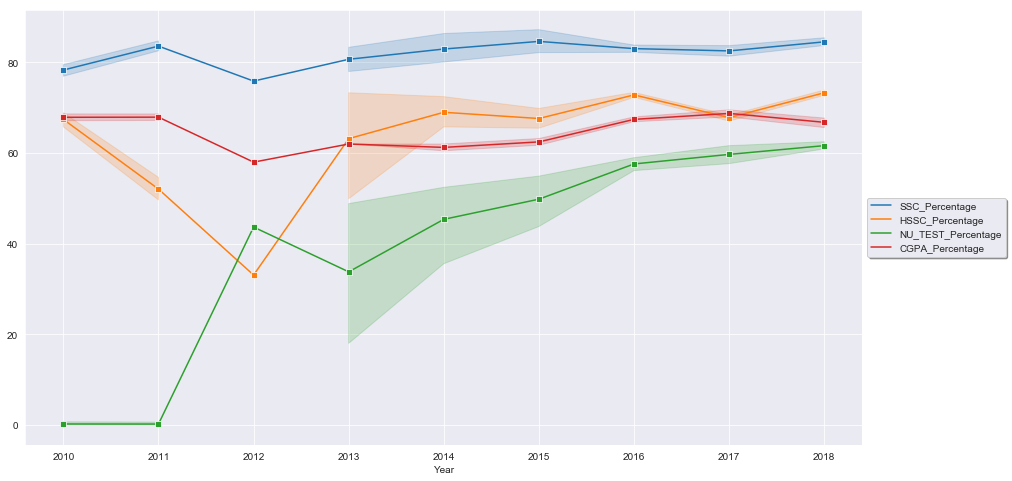

In [101]:
plt.figure(figsize=(15,8))
sns.lineplot(data=ssc_to_bs.iloc[:,4:],  dashes=False, marker='s')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, 'SSC_Percentage'),
 Text(0, 0, 'HSSC_Percentage'),
 Text(0, 0, 'NU_TEST_Percentage'),
 Text(0, 0, 'CGPA_Percentage')]

Text(0.5, 1.0, '2010')

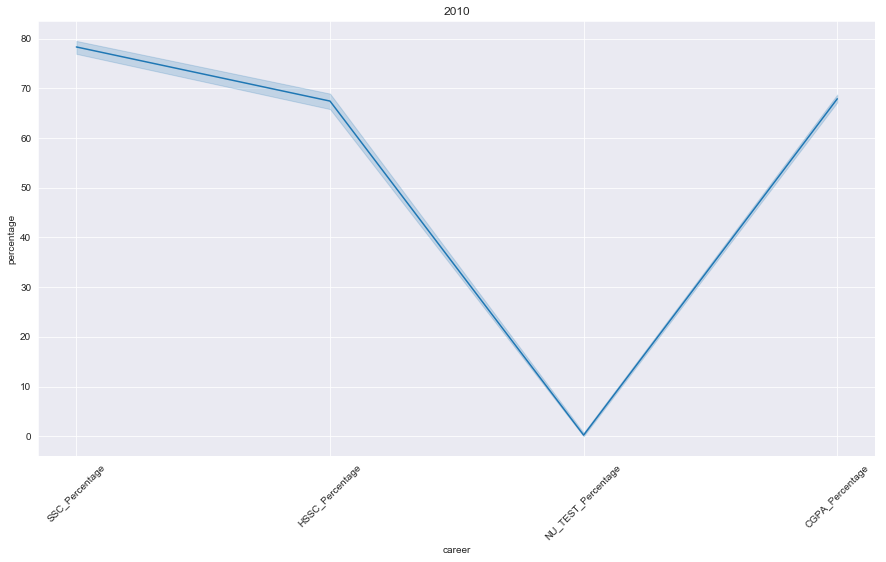

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, 'SSC_Percentage'),
 Text(0, 0, 'HSSC_Percentage'),
 Text(0, 0, 'NU_TEST_Percentage'),
 Text(0, 0, 'CGPA_Percentage')]

Text(0.5, 1.0, '2011')

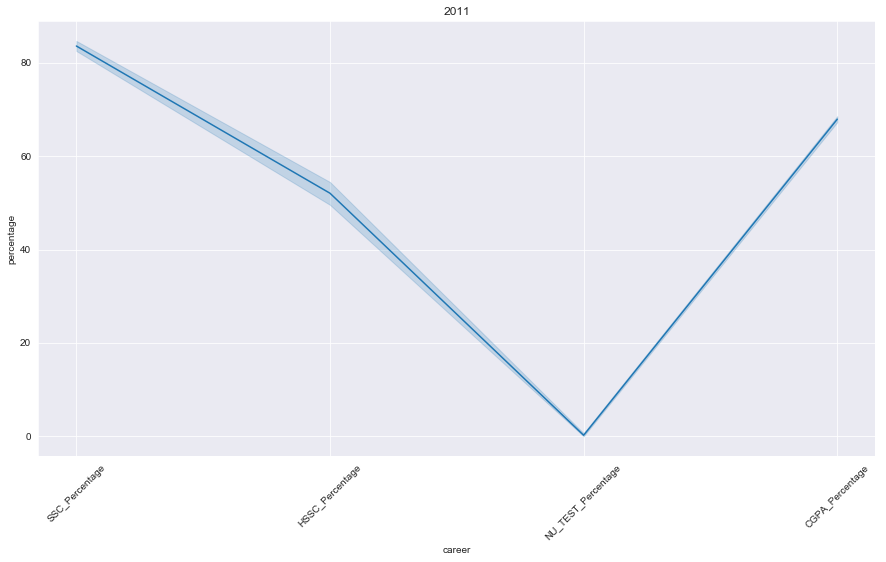

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, 'SSC_Percentage'),
 Text(0, 0, 'HSSC_Percentage'),
 Text(0, 0, 'NU_TEST_Percentage'),
 Text(0, 0, 'CGPA_Percentage')]

Text(0.5, 1.0, '2012')

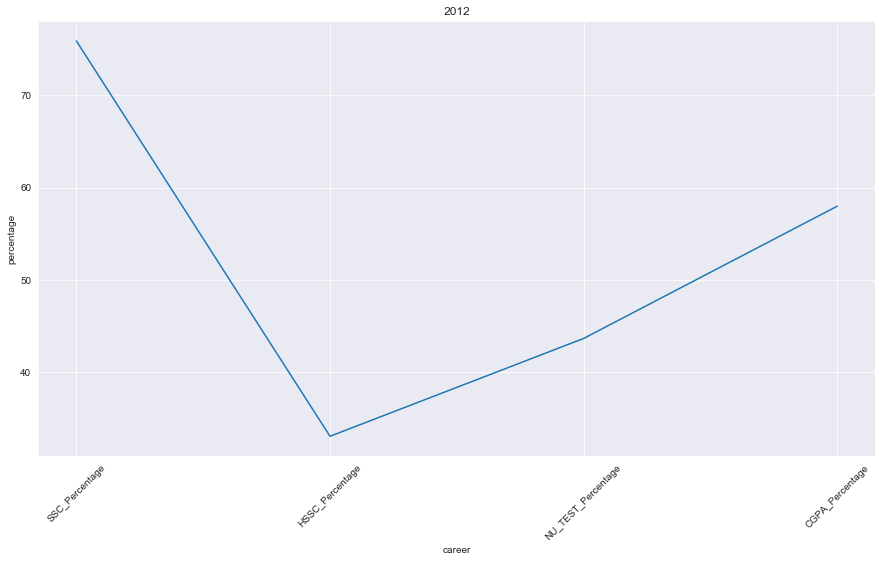

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, 'SSC_Percentage'),
 Text(0, 0, 'HSSC_Percentage'),
 Text(0, 0, 'NU_TEST_Percentage'),
 Text(0, 0, 'CGPA_Percentage')]

Text(0.5, 1.0, '2013')

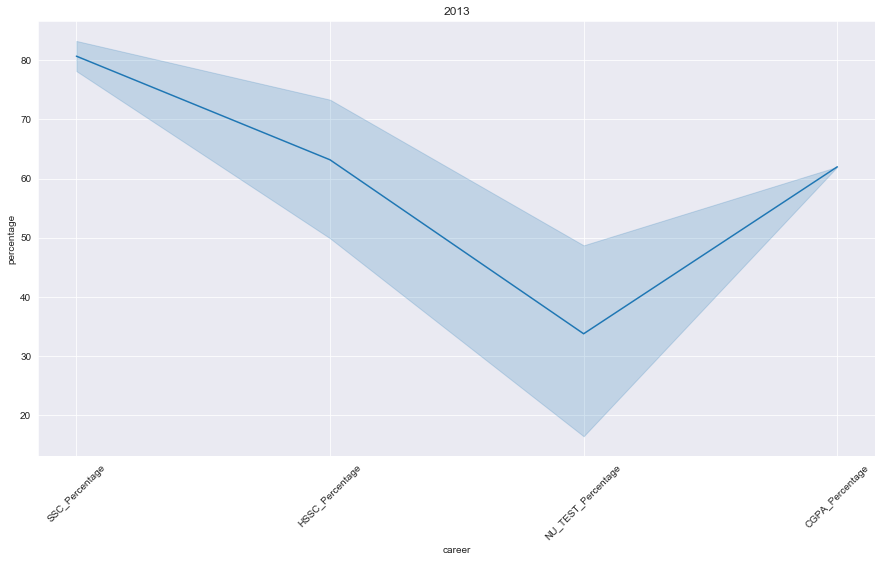

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, 'SSC_Percentage'),
 Text(0, 0, 'HSSC_Percentage'),
 Text(0, 0, 'NU_TEST_Percentage'),
 Text(0, 0, 'CGPA_Percentage')]

Text(0.5, 1.0, '2014')

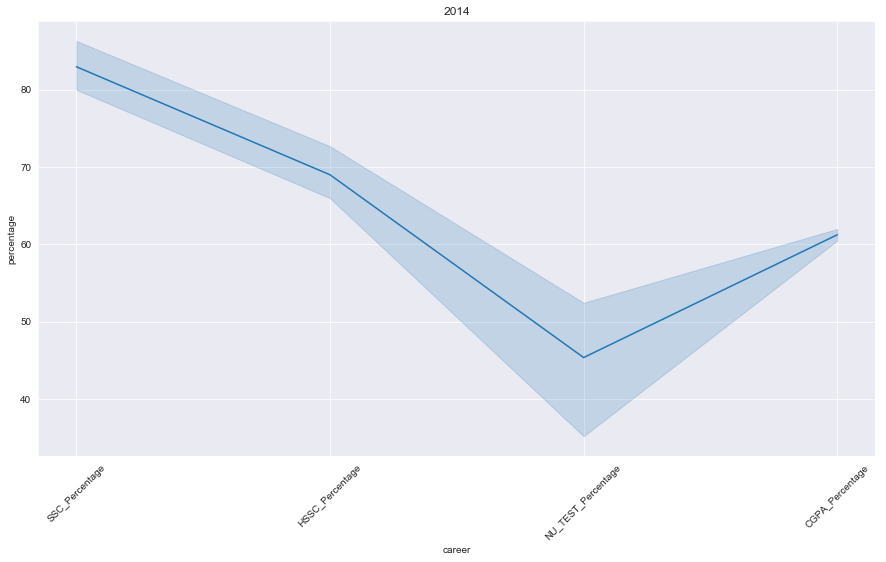

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, 'SSC_Percentage'),
 Text(0, 0, 'HSSC_Percentage'),
 Text(0, 0, 'NU_TEST_Percentage'),
 Text(0, 0, 'CGPA_Percentage')]

Text(0.5, 1.0, '2015')

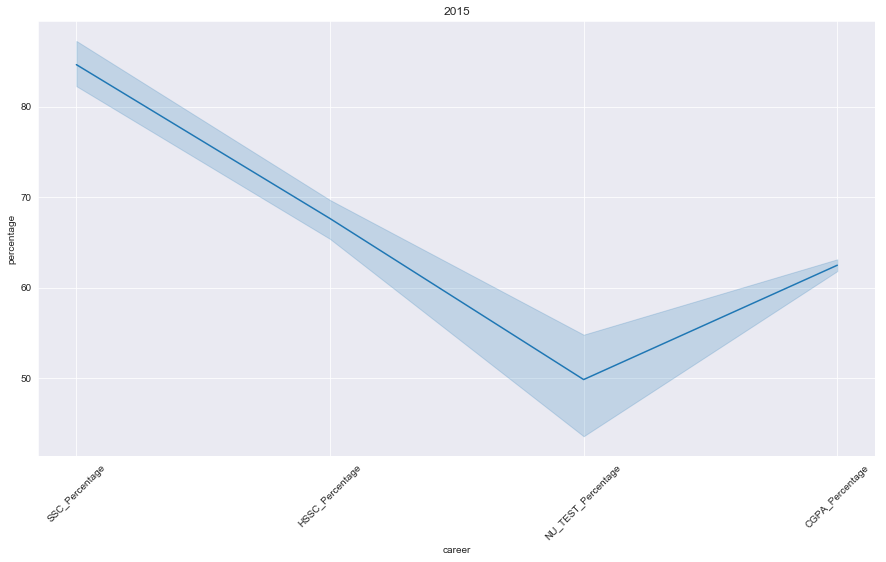

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, 'SSC_Percentage'),
 Text(0, 0, 'HSSC_Percentage'),
 Text(0, 0, 'NU_TEST_Percentage'),
 Text(0, 0, 'CGPA_Percentage')]

Text(0.5, 1.0, '2016')

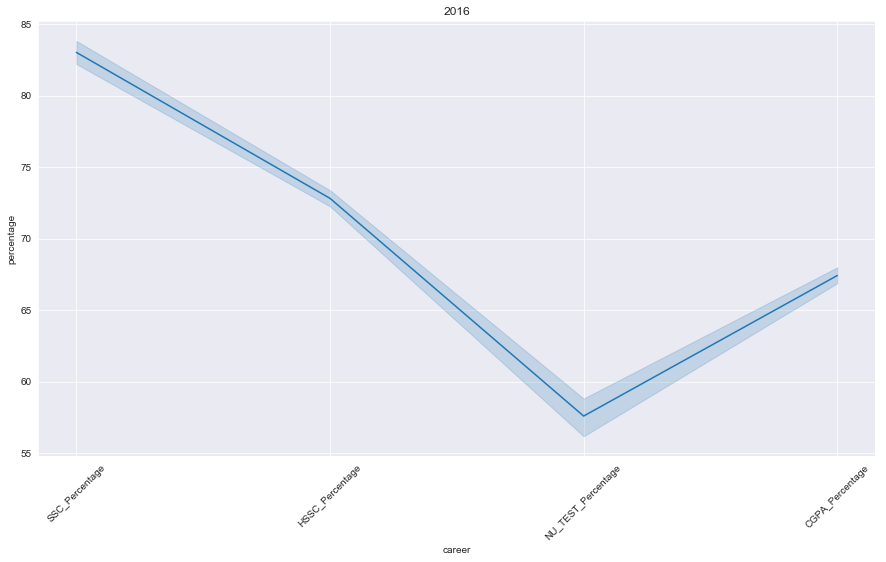

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, 'SSC_Percentage'),
 Text(0, 0, 'HSSC_Percentage'),
 Text(0, 0, 'NU_TEST_Percentage'),
 Text(0, 0, 'CGPA_Percentage')]

Text(0.5, 1.0, '2017')

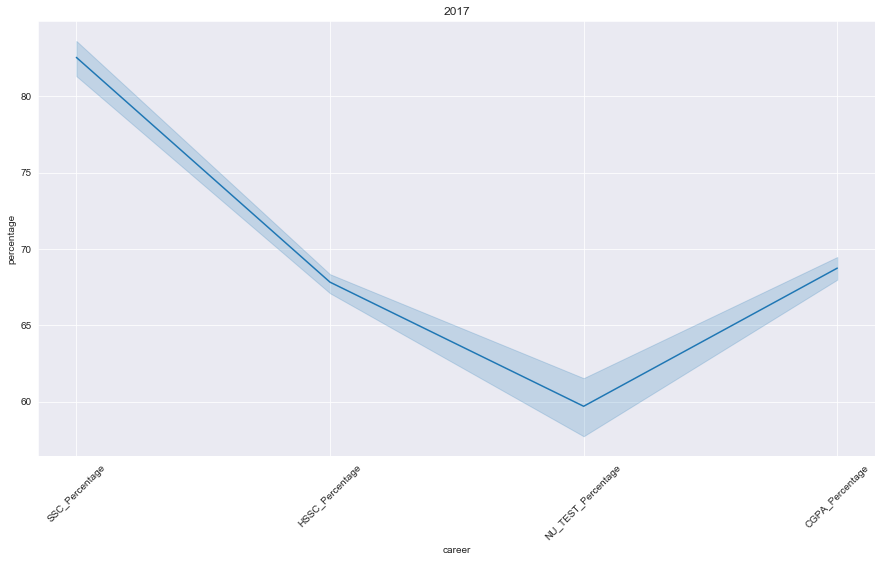

<Figure size 1080x576 with 0 Axes>

[Text(0, 0, 'SSC_Percentage'),
 Text(0, 0, 'HSSC_Percentage'),
 Text(0, 0, 'NU_TEST_Percentage'),
 Text(0, 0, 'CGPA_Percentage')]

Text(0.5, 1.0, '2018')

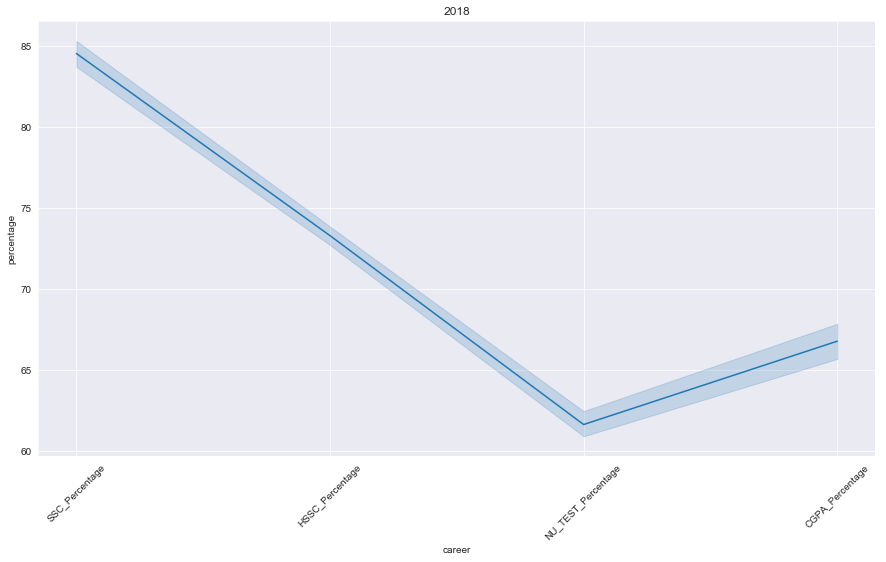

In [102]:
for x in range(2010, 2019):

    performance_of_xth_year = ssc_to_bs[ssc_to_bs.index == x]

    performance_of_xth_year = performance_of_xth_year.iloc[:,4:]

    performance_of_xth_year = performance_of_xth_year.melt(
        var_name="career", 
        value_name="percentage")

    plt.figure(figsize=(15,8))
    chart = sns.lineplot(data=performance_of_xth_year, x='career', y='percentage', sort=False)
    chart.set_xticklabels(performance_of_xth_year['career'].unique(), rotation=45)
    chart.set_title(x)
    plt.show()

In [103]:
ssc_to_bs_corr = ssc_to_bs.iloc[:,4:].corr(method='pearson')
ssc_to_bs_corr

,SSC_Percentage,HSSC_Percentage,NU_TEST_Percentage,CGPA_Percentage
SSC_Percentage,1.000000,0.082645,0.100012,0.107654
HSSC_Percentage,0.082645,1.000000,0.455181,0.047289
NU_TEST_Percentage,0.100012,0.455181,1.000000,0.030907
CGPA_Percentage,0.107654,0.047289,0.030907,1.000000


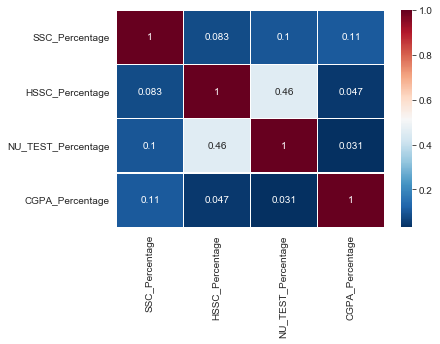

In [104]:
sns.heatmap(ssc_to_bs_corr, 
            xticklabels=ssc_to_bs_corr.columns,
            yticklabels=ssc_to_bs_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

##  Low performace in pre BS and high in BS 

Those performed well in BS as compare to SSC

In [105]:
print((len(ssc_to_bs[ssc_to_bs['SSC_Percentage'] < ssc_to_bs['CGPA_Percentage']]) / len(ssc_to_bs)) * 100, '%')

3.5422343324250685 %


Those performed well in BS as compare to HSSC

In [106]:
print((len(ssc_to_bs[ssc_to_bs['HSSC_Percentage'] < ssc_to_bs['CGPA_Percentage']]) / len(ssc_to_bs)) * 100, '%')

36.85286103542234 %


Those performed well in BS as compare to SSC and HSSC (performance increased by time)

In [107]:
print(len(ssc_to_bs[(ssc_to_bs['SSC_Percentage'] < ssc_to_bs['HSSC_Percentage']) & (ssc_to_bs['HSSC_Percentage'] < ssc_to_bs['CGPA_Percentage'])]) / len(ssc_to_bs)* 100, '%')

0.4768392370572207 %


In [108]:
performance_data = [(len(ssc_to_bs[ssc_to_bs['SSC_Percentage'] < ssc_to_bs['CGPA_Percentage']]) / len(ssc_to_bs)) * 100,
                    (len(ssc_to_bs[ssc_to_bs['HSSC_Percentage'] < ssc_to_bs['CGPA_Percentage']]) / len(ssc_to_bs)) * 100,
                    len(ssc_to_bs[(ssc_to_bs['SSC_Percentage'] < ssc_to_bs['HSSC_Percentage']) & (ssc_to_bs['HSSC_Percentage'] < ssc_to_bs['CGPA_Percentage'])]) / len(ssc_to_bs)* 100]

In [109]:
performance_data

[3.5422343324250685, 36.85286103542234, 0.4768392370572207]

Text(0.5, 1.0, 'Performance Comparison')

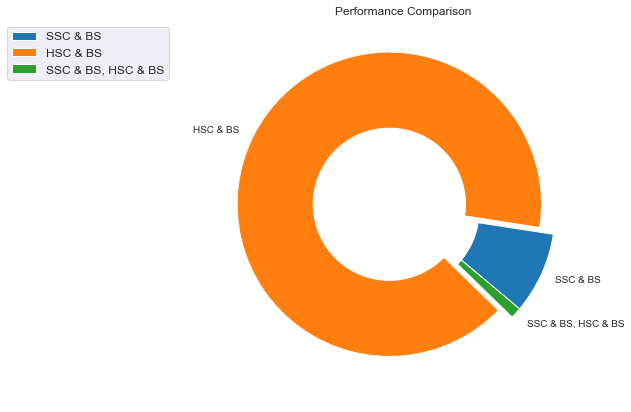

In [110]:
fig, ax = plt.subplots(figsize=(8, 7), subplot_kw=dict(aspect="equal"))
explode=(0,0.1,0)
names=['SSC & BS','HSC & BS','SSC & BS, HSC & BS']
labels=['SSC & BS','HSC & BS','SSC & BS, HSC & BS']
wedges, texts = ax.pie(performance_data, wedgeprops=dict(width=0.5), pctdistance=1.1, startangle=-40, explode=explode, labels=labels)
plt.legend(names, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=12)
ax.set_title("Performance Comparison")
plt.show()

##  Male vs Female Students

In [111]:
dfBSStudent = combined_data[['1st Semester', '2nd Semester', 'Gender']]
totalStudents = dfBSStudent.shape[0]
print("Total Students: " + str(totalStudents))
totalMaleStudents = dfBSStudent.loc[dfBSStudent["Gender"] == "M"].shape[0]
print("Total Male Students: " + str(totalMaleStudents))
totalFemaleStudents = dfBSStudent.loc[dfBSStudent["Gender"] == "F"].shape[0]
print("Total Students: " + str(totalFemaleStudents))

dfBSWarningOne =  dfBSStudent[dfBSStudent['1st Semester'] < 2.00]
print("Warning Students: " + str(dfBSWarningOne.shape[0]))
print("Warning Students Percentage: " + str(round(dfBSWarningOne.shape[0]/totalStudents * 100)) + "%")

dfBSWarningOneMale =  dfBSStudent.loc[(dfBSStudent['1st Semester'] < 2.00) & (dfBSStudent['Gender'] == "M")]
print("Warning Male Students: " + str(dfBSWarningOneMale.shape[0]))
print("Warning Male Students Percentage: " + str(round(dfBSWarningOneMale.shape[0]/totalMaleStudents * 100)) + "%")

dfBSWarningOneFemale =  dfBSStudent.loc[(dfBSStudent['1st Semester'] < 2.00) & (dfBSStudent['Gender'] == "F")]
print("Warning Female Students: " + str(dfBSWarningOneFemale.shape[0]))
print("Warning Female Students Percentage: " + str(round(dfBSWarningOneFemale.shape[0]/totalFemaleStudents * 100)) + "%")

improvedMaleWarningStudents = dfBSWarningOneMale.loc[(dfBSWarningOneMale['2nd Semester'] > 2.00)].shape[0]
print("Male Students Performing after warning: " + str(improvedMaleWarningStudents))
print("Male Students Performing after warning Percentage: " + str(round(improvedMaleWarningStudents/dfBSWarningOneMale.shape[0] * 100)) + "%")

improvedFeMaleWarningStudents = dfBSWarningOneFemale.loc[(dfBSWarningOneFemale['2nd Semester'] > 2.00)].shape[0]
print("Female Students Performing  after warning: " + str(improvedFeMaleWarningStudents))
print("Female Students Performing after warning Percentage: " + str(round(improvedFeMaleWarningStudents/dfBSWarningOneFemale.shape[0] * 100)) + "%")


Total Students: 1468
Total Male Students: 1256
Total Students: 212
Warning Students: 522
Warning Students Percentage: 36%
Warning Male Students: 464
Warning Male Students Percentage: 37%
Warning Female Students: 58
Warning Female Students Percentage: 27%
Male Students Performing after warning: 362
Male Students Performing after warning Percentage: 78%
Female Students Performing  after warning: 46
Female Students Performing after warning Percentage: 79%


In [112]:
male_female_performance = [round(improvedMaleWarningStudents/dfBSWarningOneMale.shape[0] * 100),
                    round(improvedFeMaleWarningStudents/dfBSWarningOneFemale.shape[0] * 100)]

In [113]:
male_female_performance

[78, 79]

Text(0.5, 1.0, 'Male vs Female Performance Comparison')

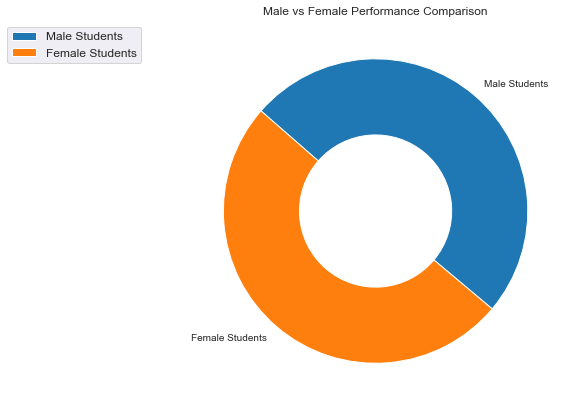

In [114]:
fig, ax = plt.subplots(figsize=(8, 7), subplot_kw=dict(aspect="equal"))
names=['Male Students','Female Students']
labels=['Male Students','Female Students']
wedges, texts = ax.pie(male_female_performance, wedgeprops=dict(width=0.5), pctdistance=1.1, startangle=-40, labels=labels)
plt.legend(names, loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=12)
ax.set_title("Male vs Female Performance Comparison")
plt.show()

In [115]:
maleData = combined_data[combined_data["Gender"] == "M"]["CGPA"]
femaleData = combined_data[combined_data["Gender"] == "F"]["CGPA"]

In [116]:
ztest ,pval1 = stests.ztest(maleData, x2=femaleData, value=0,alternative='two-sided')
print(float(pval1))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

6.605963920219591e-07
reject null hypothesis


In [117]:
male_data = pd.DataFrame(maleData)

In [118]:
female_data = pd.DataFrame(femaleData) 

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Male vs Female')

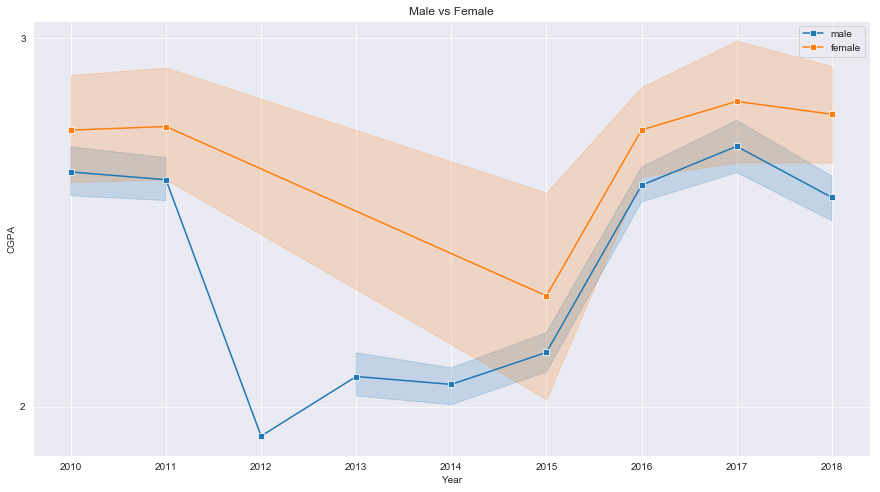

In [119]:
plt.figure(figsize=(15,8))
chart = sns.lineplot(data=male_data, x=male_data.index, y='CGPA', sort=False, label='male', legend='brief', marker='s')
chart = sns.lineplot(data=female_data, x=female_data.index, y='CGPA', sort=False, label='female', legend='brief', marker='s')
chart.locator_params(integer=True)
chart.set_title("Male vs Female")

#  Data Modeling

In [120]:
merged_percentages.head()

,Marks_Percentage_Average,CGPA_Percentage
0,19.922870,62
1,49.094474,74
2,33.089127,62
3,51.372549,62
4,40.955437,62


## Linear Regression for CGPA

In [121]:
X = merged_percentages['Marks_Percentage_Average'].values.reshape(-1,1)
y = merged_percentages['CGPA_Percentage'].values.reshape(-1,1)

In [122]:
#Splitting 80% data, while 20% data for test

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [124]:
# Now training the data

In [125]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [126]:
# Printing intercept and slope for the linear regression

In [127]:
print(regressor.intercept_)
print(regressor.coef_)

[65.00344381]
[[0.0365595]]


In [128]:
# Now predicting CGPA

In [129]:
y_pred = regressor.predict(X_test)

In [130]:
# Creating new dataframe for actual and predicted CGPA

In [131]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,82,66.513722
1,66,67.461114
2,70,67.667969
3,78,67.675561
4,62,67.656132


In [132]:
# Printing mean absoulte erro and mean squarred error

In [133]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.344387959724447
Mean Squared Error: 30.126806823880436
Root Mean Squared Error: 5.4887891947022736


In [134]:
('Mean Absolute Error:', 3.19932917837853)
('Mean Squared Error:', 17.631568097568447)
('Root Mean Squared Error:', 4.198996082109204)

('Mean Absolute Error:', 3.19932917837853)

('Mean Squared Error:', 17.631568097568447)

('Root Mean Squared Error:', 4.198996082109204)

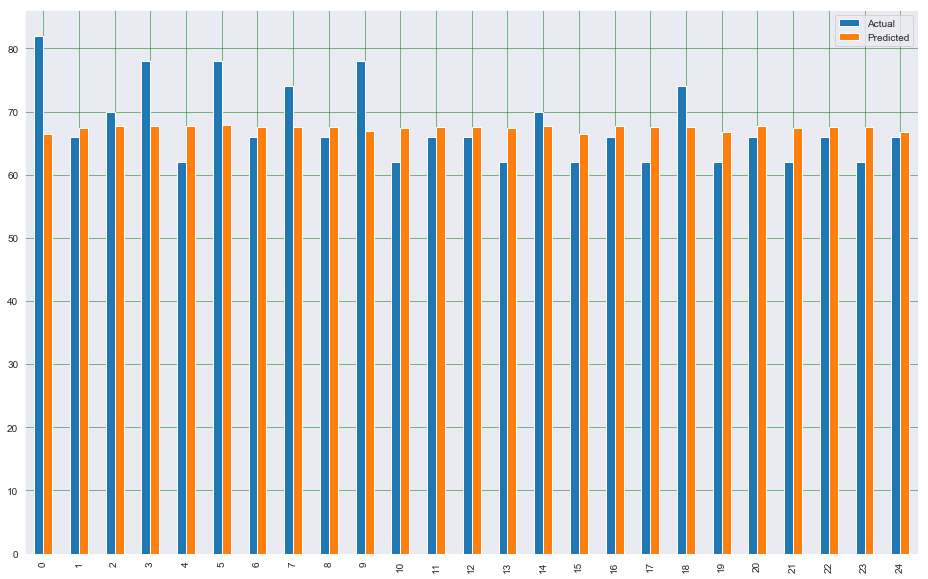

In [135]:
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Pre BS and BS Percentages')

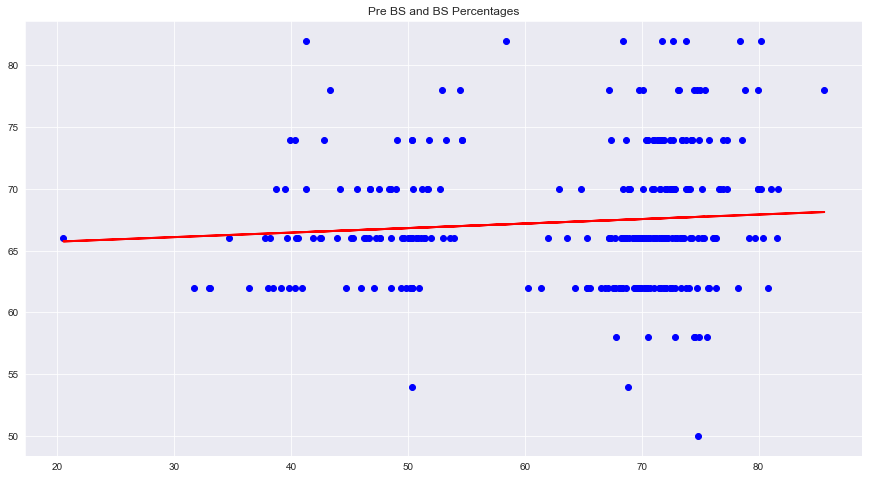

In [136]:
plt.figure(figsize=(15,8))
plt.scatter(X_test, y_test,  color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted")
plt.title("Pre BS and BS Percentages")
plt.show()

# Presentation and Automation

## Least square Regression Line

In [137]:
n = X.shape[1]
r = np.linalg.matrix_rank(X)

In [138]:
# Finding SVD

In [139]:
U, sigma, VT = np.linalg.svd(X, full_matrices=False)

In [140]:
D_plus = np.diag(np.hstack([1/sigma[:r], np.zeros(n-r)]))

In [141]:
V = VT.T

In [142]:
X_plus = V.dot(D_plus).dot(U.T)
print("SVD: "+ str(X_plus))

SVD: [[3.09983604e-06 7.63869970e-06 5.14839818e-06 ... 1.30250208e-05
  1.11145799e-05 1.15158321e-05]]


In [143]:
w = X_plus.dot(y)
print("Least Square: "+ str(w))

Least Square: [[1.00179245]]


In [144]:
error = np.linalg.norm(X.dot(w) - y, ord=2) ** 2

In [145]:
# Printing Least Squares, Sum of residuals, Rank of the matrix and singular value of the matrix

In [146]:
np.linalg.lstsq(X, y)

(array([[1.00179245]]), array([296094.75761953]), 1, array([2535.16708642]))

<Figure size 1080x576 with 0 Axes>

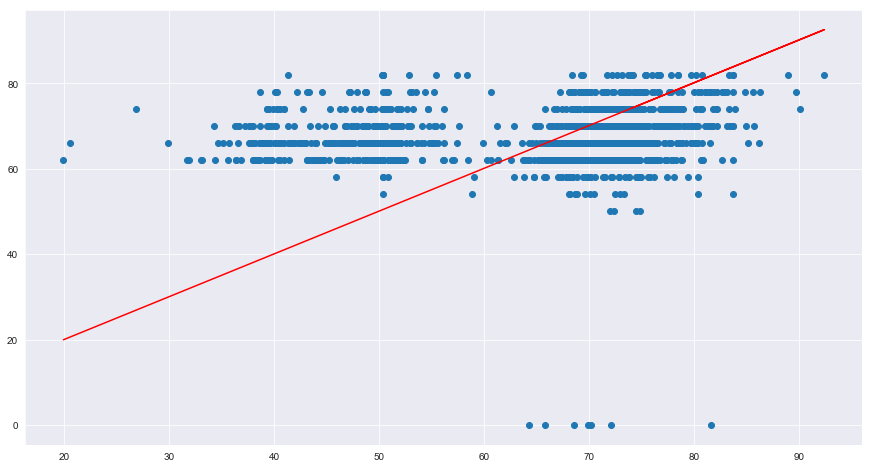

In [147]:
plt.figure(figsize=(15,8))
plt.scatter(X, y)
plt.plot(X, w*X, c='red')